In [1]:
# Importing Libraries

from keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Loading and Selecting Columns

df = (
    pd.read_csv("../kidney_disease.csv")[
        ["sg", "al", "sc", "hemo", "pcv", "wc", "rc", "htn", "classification"]
    ]
    .dropna()
    .copy()
)

In [3]:
# Encoding categorical values

label_encoders = {}
for col in df.columns:
    if not np.issubdtype(df[col].dtype, np.number):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # save encoder if we need to decode later

In [4]:
# Split Into Features (x) and Label (y)

X = df.drop("classification", axis=1)
y = df["classification"]

In [5]:
# Train-Test Spliting

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42
)

In [6]:
# Scale Features

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# We use Formula of MinMaxScaler

In [7]:
# Build Neural Network

model = Sequential(
    [
        layers.Input(
            shape=(X_train.shape[1],)
        ),  # X_train.shape[1] → number of columns (features per patient).
        layers.Dense(256, activation="relu", kernel_initializer="he_normal"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

"""
weights: numbers that control how strongly each input affects the neuron.
training: adjusts weights again and again until the network predicts correctly.
initializer: decides the starting values of the weights before training.
"""

"""
ReLU is used in the hidden layer neurons → they do multiplication + addition + ReLU (max(0, x)).

Sigmoid is used in the output neuron → it also does multiplication + addition, then passes the result through the sigmoid function which makes sure that it squashes the result into the range of 0-1.
"""

"""
Inputs (8 features) → go into 256 ReLU neurons.
each neuron does multiplication + addition + ReLU.
result: a vector of 256 numbers.

those 256 numbers → go into the 1 sigmoid neuron.
it multiplies each of the 256 values by its own weights, adds them up, plus bias.
then applies sigmoid → produces a value between 0 and 1.

WE interpret:
≥ 0.5 → CKD (positive class)
< 0.5 → Not CKD (negative class)
"""

'\nInputs (8 features) → go into 256 ReLU neurons.\neach neuron does multiplication + addition + ReLU.\nresult: a vector of 256 numbers.\n\nthose 256 numbers → go into the 1 sigmoid neuron.\nit multiplies each of the 256 values by its own weights, adds them up, plus bias.\nthen applies sigmoid → produces a value between 0 and 1.\n\nWE interpret:\n≥ 0.5 → CKD (positive class)\n< 0.5 → Not CKD (negative class)\n'

In [8]:
# Compile Model

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

"""
compares the predicted probability (from sigmoid, e.g. 0.8) with the actual label (0 = Not CKD, 1 = CKD).
"""

"""
after the loss results, the optimizer decides how to adjust the weights to improve next time.
"""

"""
metrics=["accuracy"] it shows us how well the model is doing.
accuracy = percentage of correct predictions.
-> if out of 100 patients, 90 are predicted correctly → accuracy = 90%.
"""

'\nmetrics=["accuracy"] it shows us how well the model is doing.\naccuracy = percentage of correct predictions.\n-> if out of 100 patients, 90 are predicted correctly → accuracy = 90%.\n'

In [9]:
# Training the Model

es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=200,  # number of passes through training data
    batch_size=32,  # process 32 samples at a time
    callbacks=[es],
    verbose=0,  # 0 = silent, 1 = progress bar
)

# history variable stores logs of each epochs

In [10]:
# Save Trained Model

model.save("ckd.keras")

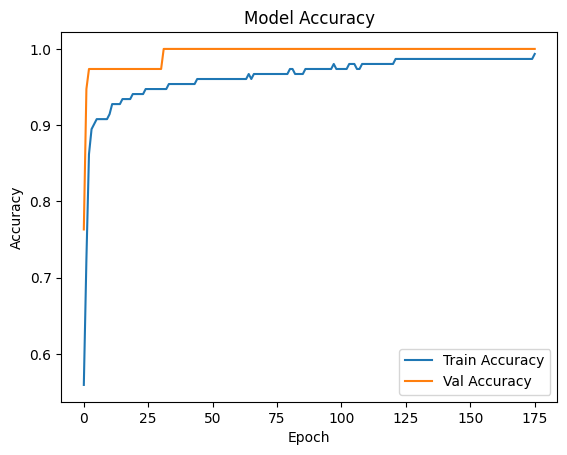

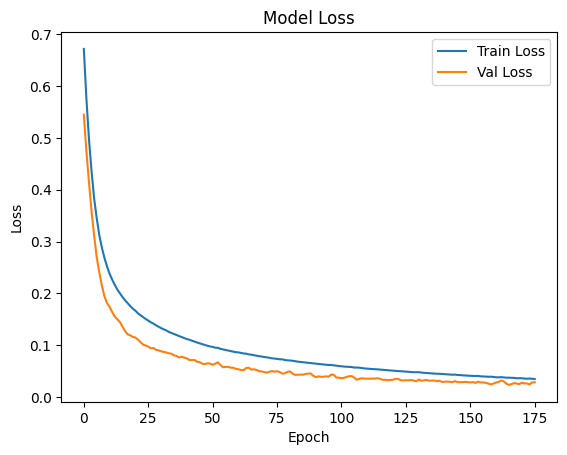

In [11]:
# Plot Training Results

# If the lines goes higher it's more accurate

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# If the line goes lower there are small loss

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
# Making Prediction on Test Data

probs = model.predict(X_test)
pred = (probs >= 0.5).astype(int).ravel()

"""
probs >= 0.5 -> Gives us true and false value that's why we do astype(int) this convert's true and false into 0's and 1's

.ravel() just make sure all the 0's and 1's are saved into a 1d array(flat array)
"""

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


"\nprobs >= 0.5 -> Gives us true and false value that's why we do astype(int) this convert's true and false into 0's and 1's\n\n.ravel() just make sure all the 0's and 1's are saved into a 1d array(flat array)\n"

In [13]:
# Printing Results

print("Original:  {0}".format(", ".join(str(int(v)) for v in y_test)))
print("Predicted: {0}".format(", ".join(str(int(v)) for v in pred)))

Original:  0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1
Predicted: 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1


In [14]:
# Evaluation Metrics

print("Test Accuracy:", accuracy_score(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred, digits=3))


"""
Precision=TP/(TP+FP) -> High precision means few false positives (FP).
Recall=TP/(TP+FN) -> High recall means few false negatives (FN).
"""

Test Accuracy: 1.0

Confusion Matrix:
 [[22  0]
 [ 0 26]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      1.000     1.000     1.000        26

    accuracy                          1.000        48
   macro avg      1.000     1.000     1.000        48
weighted avg      1.000     1.000     1.000        48



'\nPrecision=TP/(TP+FP) -> High precision means few false positives (FP).\nRecall=TP/(TP+FN) -> High recall means few false negatives (FN).\n'